# Análisis de estadísticas de Vinicius Junior en Champions League 22/23

Para el proyecto final del certificado de Google en análisis de datos he decidido hacer un dashboard en Tableau con los datos de la Champions League del año 2022-2023 de Vinicius Junior, jugador del Real Madrid.

Los datos provienen de la página web FBREF. https://fbref.com/

**Se adjuntan en la carpeta dataset de este repositorio los 5 csv de los datos sobre los que se trabajarán en el proyecto**

## Pasos a seguir

<ol>
    <li>Se extraen los datos de FBREF</li>
    <li>Se limpian los datos con Excel</li>
    <li>Se preparan para su exportación y para la creación de un dataset</li>
    <li>Se crea un dataset en  <a href="https://www.kaggle.com/datasets/eduvadillo/2223-champions-league-stats/data">Kaagle</a></li>
    <li>Se añade la consulta en BQ
        <ul>
            <li>Se hace un join con las 5 tablas para acceder a todos los datos y estadísticas</li>
            <li>Se seleccionan los datos de cada tabla con los que queremos trabajar</li>
            <li>Se almacena toda la consulta en un nuevo dataframe</li>
            <li>Se exporta el nuevo dataframe a Tableau para la creación del dashboard</li>
        </ul></li>
    <li>Se crea el dashboard en <a href="https://public.tableau.com/views/ViniciusJuniorUEFAChampionsLeague2223Report/Informejugador?:language=es-ES&:display_count=n&:origin=viz_share_link"> Tableau</a></li>
</ol>

## Preparación del entorno para bigquery
<ol>
    <li>Se importa el módulo a través de la API creada para acceder a los datos públicos de Big Query</li>
    <li>También se importa la librería de Big Query</li>
</ol>

In [1]:
import os 
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'C:/Users/Vadillo/git_repo/Google-certificate-final-project/proyecto-final.json'

#Imports google cloud client library and initiates BQ service
from google.cloud import bigquery
bigquery_client = bigquery.Client()


## Creación de la consulta en BQ

<ol>
    <li>Se hace un join con las 5 tablas para acceder a todos los datos y estadísticas</li>
    <li>Se seleccionan los datos de cada tabla con los que queremos trabajar</li>
    <li>Se almacena toda la consulta en un nuevo dataframe que utilizaremos para crear el dashboard</li>
</ol>

In [2]:
#Write Query on BQ
QUERY = """
    select
        jugadores.ID, jugadores.Jugador, jugadores.Pais, jugadores.Equipo, jugadores.Posicion, jugadores.Edad, jugadores.Minutos_totales, jugadores.Partidos_jugados, jugadores.Partidos_titular, jugadores.Partidos_completos/100 as Partidos_90s,

        pases.Pases_intentados, Pases_completados, Porcent_pases_completados as Porcent_pases_totales, Distancia_total_pases, Distancia_progresiva_pase, Distancia_total_pases, IfNULL(Round(Distancia_progresiva_pase/nullif(Distancia_total_pases, 0), 2), 0) as Porcent_pases_progresivos, 

        regates.Regates_intentados, regates.Regates_completados, regates.Porcent_regates, regates.Conducciones, regates.Perdida_balon, 

        tiros.Tiros, tiros.Tiros_90, tiros.Tiros_a_puerta, tiros.Tiros_a_puerta_90, tiros.Porcent_tiros, tiros.Goles, tiros.Goles_tiros, tiros.Goles_de_no_penalti AS Goles_no_penalti, tiros.Penaltis_intentados, tiros.Penaltis_convertidos,

        defensa.Entradas, defensa.Entradas_ganadas, IfNULL(Round(defensa.Entradas_ganadas/nullif(defensa.Entradas, 0), 2), 0) as Porct_entradas,Disparos_bloqueados, defensa.Pases_bloqueados as Pases_cortados, defensa.Duelos_aereos_ganados, defensa.Duelos_aereos_perdidos, defensa.Porcent_duelos_aereos
    from
        `22_23_cuampions_league_player_stats.jugadores` as jugadores
    join
        `22_23_cuampions_league_player_stats.pases` as pases ON jugadores.ID = pases.ID
    join
        `22_23_cuampions_league_player_stats.regates` as regates ON jugadores.ID = regates.ID
    join
        `22_23_cuampions_league_player_stats.tiros` as tiros ON jugadores.ID = tiros.ID
    join
        `22_23_cuampions_league_player_stats.defensa` as defensa ON jugadores.ID = defensa.ID
    WHERE 
        jugadores.Posicion != "GK"
    AND
        Partidos_completos/100 >= 3
"""



## Ejecutamos la consulta y la escribimos como un dataframe de pandas para la visualización de los resultados

In [3]:
Query_Results = bigquery_client.query(QUERY)
df = Query_Results.to_dataframe()

## Mostramos las 5 primeras filas y una parte de las columnas creadas en el nuevo dataframe

In [4]:
df.sample(5)

,ID,Jugador,Pais,Equipo,Posicion,Edad,Minutos_totales,Partidos_jugados,Partidos_titular,Partidos_90s,...,Penaltis_intentados,Penaltis_convertidos,Entradas,Entradas_ganadas,Porct_entradas,Disparos_bloqueados,Pases_cortados,Duelos_aereos_ganados,Duelos_aereos_perdidos,Porcent_duelos_aereos
17,475,Bohdan Mykhaylychenko,UA,Shakhtar,DF,25,360,4,4,4.00,...,0,0,7,2,0.29,0,3,4,1,80.00
255,641,Niklas Süle,DE,Dortmund,DF,26,675,8,7,7.50,...,0,0,5,5,1.00,6,3,7,2,77.78
59,48,Mitchel Bakker,DE,Leverkusen,"MF,DF",22,338,5,4,3.76,...,0,0,9,5,0.56,0,6,5,1,83.33
240,619,Milan Škriniar,IT,Inter,DF,27,536,8,6,5.96,...,0,0,9,6,0.67,9,2,13,9,59.09
291,211,Phil Foden,ENG,Manchester City,"MF,FW",22,384,8,3,4.27,...,0,0,5,4,0.80,0,3,1,6,14.29


## Creación de dashboard en Tableau

<ul>
    <li>Se añade la fuente de datos a Tableau para comenzar con la creación del dashboard</li>
    <li>Se crean dos gráficos de dispersión
        <ol>
            <li>Regates exitosos vs intentados por 90 minutos</li>
            <li>Conducciones vs pérdidas por 90 minutos</li>
        </ol></li>
</ul>

### Regates exitosos vs intentados por 90 minutos

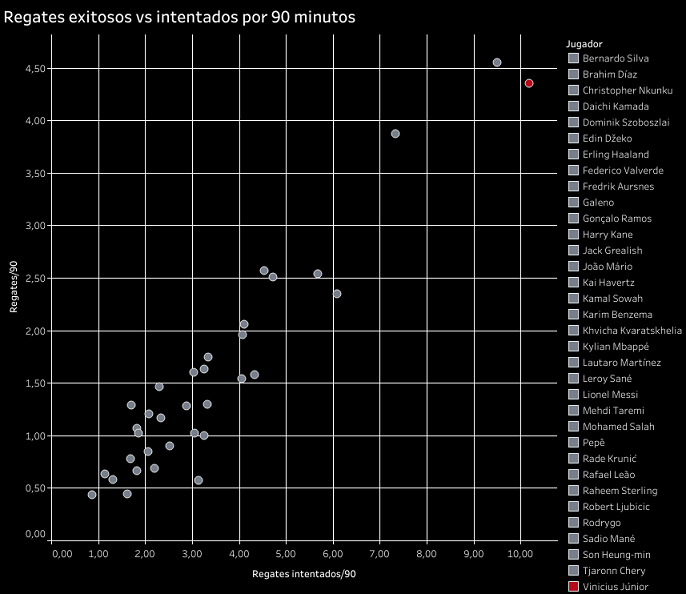

### Conducciones vs pérdidas por 90 minutos

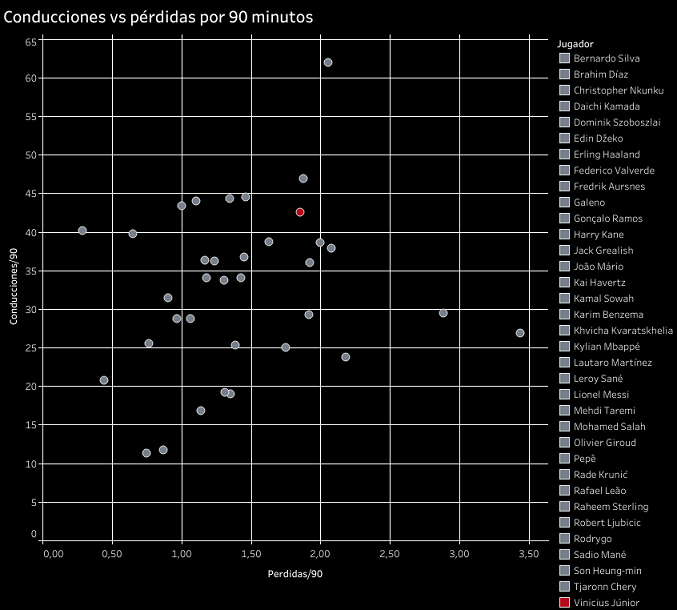

<ul>
    <li>Después, con un gráfico de barras horizontales, comparamos los 9 mejores en las siguientes estadísticas<ol>
        <li>Goles totales</li>
        <li>Tiros a puerta por cada 90 minutos jugados para hacer la media por partidos completos</li>
    </ol>
</ul>

### Goles totales

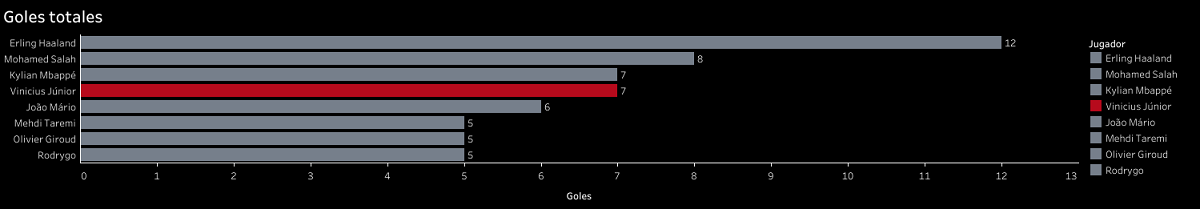

### Tiros a puerta por cada 90 minutos

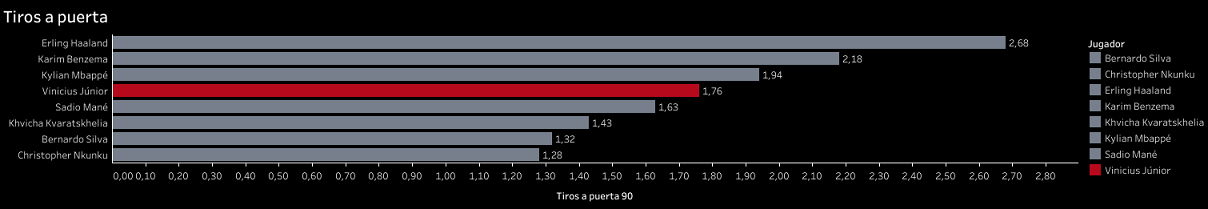

<ul>
        <li>Por último creamos el informe completo del jugador<ol>
        <li>Se añaden imágenes del jugador, su equipo y la competición analizada</li>
        <li>También se añaden datos personales y estadísticos generales en la competición</li>
        <li>Se completa el dashboard con los gráficos creados anteriormente</li>
    </ol></li>
<ul>

## Resultado final

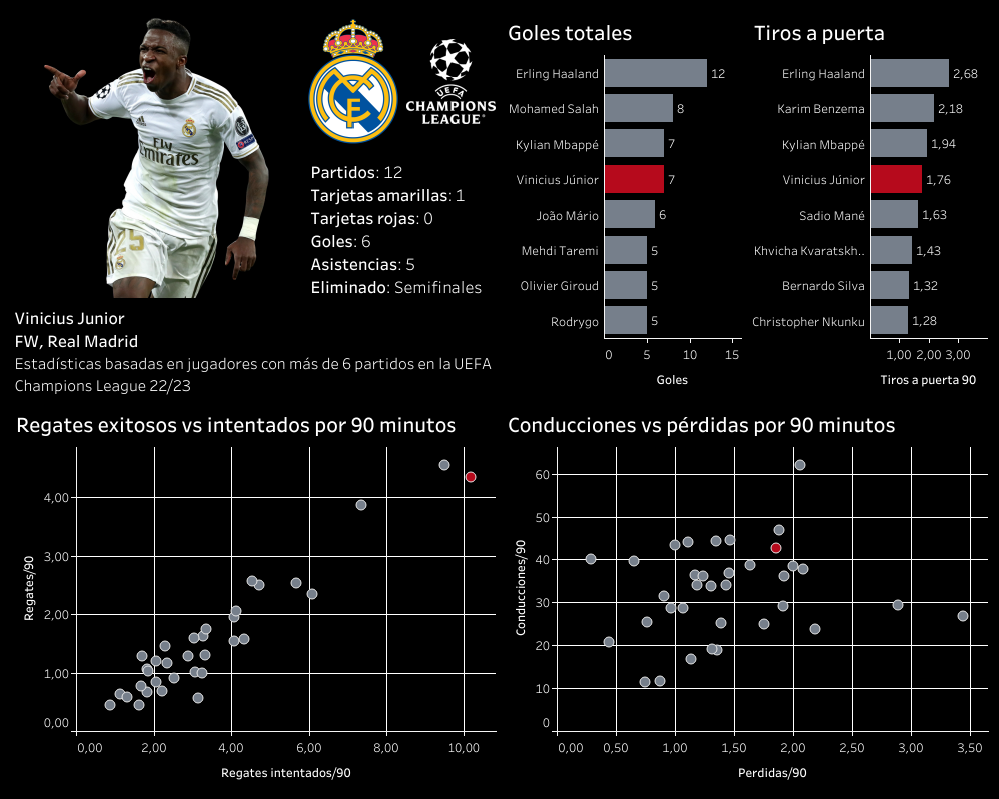